<a href="https://colab.research.google.com/github/cmgpcinthia/Big_Data_Machine_Learning/blob/main/11_Clase25N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduccion a Modelos

##Dataset BANK

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
bank = pd.read_csv("/content/drive/MyDrive/ESESA Lessons/BANK.csv" , sep=";", decimal=",")

In [ ]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
bank.shape

(45211, 17)

In [ ]:
bank_dummies = pd.get_dummies(bank, columns=["job", "marital", "education", "default", "housing","loan","contact","month","poutcome"])

In [ ]:
y = bank_dummies["y"]
del bank_dummies["y"]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = bank_dummies

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.8708923154701719

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)
lg.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8933897876643074

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9028058645096056

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print(tree.score(X_test, y_test))
print(confusion_matrix(y_test, tree.predict(X_test)))
print(classification_report(y_test, tree.predict(X_test)))

0.8719666329625885
[[25792  2171]
 [ 1881  1804]]
              precision    recall  f1-score   support

          no       0.93      0.92      0.93     27963
         yes       0.45      0.49      0.47      3685

    accuracy                           0.87     31648
   macro avg       0.69      0.71      0.70     31648
weighted avg       0.88      0.87      0.87     31648



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print(rf.score(X_test, y_test))
print(confusion_matrix(y_test, rf.predict(X_test)))
print(classification_report(y_test, rf.predict(X_test)))

0.9029322548028311
[[27185   778]
 [ 2294  1391]]
              precision    recall  f1-score   support

          no       0.92      0.97      0.95     27963
         yes       0.64      0.38      0.48      3685

    accuracy                           0.90     31648
   macro avg       0.78      0.67      0.71     31648
weighted avg       0.89      0.90      0.89     31648



In [ ]:
clasificacion - confussion matrix

In [ ]:
mist = pd.read_csv("/content/drive/MyDrive/mnist.csv")

In [ ]:
mist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = mist.drop("label", axis=1)
y = mist["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print(tree.score(X_test, y_test))
print(confusion_matrix(y_test, tree.predict(X_test)))
print(classification_report(y_test, tree.predict(X_test)))

0.8658333333333333
[[1094    0   10    8    8   18   17    3   19   11]
 [   0 1289   11   11    1    7    2    3   11    5]
 [  13   17  979   30   15   12   20   26   42    8]
 [   8   11   49 1034   16   65    6   22   32   22]
 [   7    3   12   11 1038   12   20   11   24   58]
 [  22   15    9   41   15  849   26   11   37   27]
 [  23    5   24   10   17   21 1043    7   14    6]
 [   2   11   22   20   13    5    1 1145   14   43]
 [  15   20   21   34   22   37   27   13  944   37]
 [   9    7   11   30   57   27    1   36   28  975]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1188
           1       0.94      0.96      0.95      1340
           2       0.85      0.84      0.85      1162
           3       0.84      0.82      0.83      1265
           4       0.86      0.87      0.87      1196
           5       0.81      0.81      0.81      1052
           6       0.90      0.89      0.89      1170
           7     

##Dataset Telco

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ESESA Lessons/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df, columns=["gender", 'Partner', 'Dependents', "PhoneService", "MultipleLines","InternetService","OnlineSecurity", 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       "PaymentMethod"])

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors="coerce")

In [ ]:
df.shape

(7043, 47)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(["Churn", "customerID"], axis=1)
y = df["Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print(tree.score(X_test, y_test))
print(confusion_matrix(y_test, tree.predict(X_test)))

print(classification_report(y_test, tree.predict(X_test)))

0.7097232079489
[[801 211]
 [198 199]]
              precision    recall  f1-score   support

          No       0.80      0.79      0.80      1012
         Yes       0.49      0.50      0.49       397

    accuracy                           0.71      1409
   macro avg       0.64      0.65      0.64      1409
weighted avg       0.71      0.71      0.71      1409



#INTRODUCCION A ALGORITMOS (Classifier/Regressor)


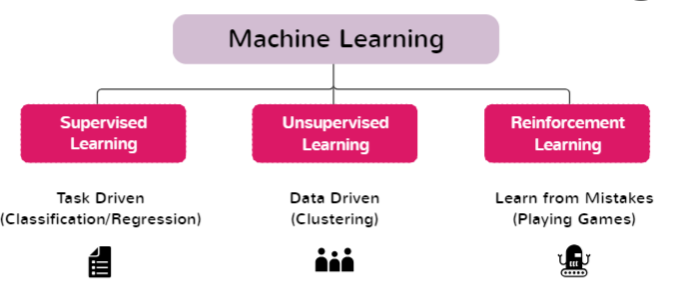

ALGORITMOS (Classifier /Regressor)
1. Lineal Regression
2. Random Forest
3. Desition Trees
4. GraadientBooster
    #Bagging
    #Boosting (undersampling,oversampling,repeticion)
5. Support Vector Machine

##Dataset Bicis


In [ ]:
bici = pd.read_csv("") %buscar el dataset de bicis%

In [ ]:
bici

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.59,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.2424,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.2317,0.483333,0.350754,364,1432,1796


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
bici.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
X = bici[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]

In [ ]:
lr = LinearRegression()
lr.fit(X,bici["cnt"])

LinearRegression()

In [ ]:
lr.score(X,bici["cnt"])

0.8002441102343252

In [ ]:
lr.coef_

array([  509.77519829,  2040.70340166,   -38.97956441,  -518.99193125,
          69.0622163 ,   120.35698921,  -610.98700811,  2028.91610348,
        3573.2742884 , -1018.86157122, -2557.56913787])

In [ ]:
#MEAN    Error Absoluto Medio
(bici.cnt - lr.predict(X)).abs().mean()

np.float64(644.9650583269287)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(X,bici["cnt"])

RandomForestRegressor()

In [ ]:
(bici.cnt - rf.predict(X)).abs().mean()

np.float64(166.58190150478796)

In [ ]:
sevilla = pd.read_csv("/content/drive/MyDrive/ESESA Lessons/CONSUMO SEVILLA DIARIO.csv", sep=";", decimal=",")

In [ ]:
sevilla.dropna(subset=['TEMPERATURA'], inplace=True)

In [ ]:
sevilla.sample(5)

,Timestamp,DIASEM,CONSUMO,LLUVIA,TEMPERATURA,ANNO,MES
360,27/12/06 8:00,miercoles,262.6,0.0,18.5,2006,12
293,21/10/06 8:00,sabado,261.8,0.0,23.6,2006,10
3139,4/8/14 8:00,lunes,201.8,0.0,30.2,2014,8
1367,29/9/09 8:00,martes,272.8,1.6,27.6,2009,9
1547,28/3/10 8:00,domingo,219.7,0.0,22.8,2010,3


In [ ]:
sevilla.shape

(4112, 7)

In [ ]:
sevilla_dummies = pd.get_dummies(sevilla, columns=["DIASEM"])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
sevilla_dummies.head()

,Timestamp,CONSUMO,LLUVIA,TEMPERATURA,ANNO,MES,DIASEM_domingo,DIASEM_jueves,DIASEM_lunes,DIASEM_martes,DIASEM_miercoles,DIASEM_sabado,DIASEM_viernes
0,1/1/06 8:00,218.7,0.0,17.5,2006,1,True,False,False,False,False,False,False
1,2/1/06 8:00,249.2,0.0,17.3,2006,1,False,False,True,False,False,False,False
2,3/1/06 8:00,269.5,0.0,16.0,2006,1,False,False,False,True,False,False,False
3,4/1/06 8:00,268.9,0.0,15.2,2006,1,False,False,False,False,True,False,False
4,5/1/06 8:00,256.9,0.4,15.2,2006,1,False,True,False,False,False,False,False


In [ ]:
X = sevilla_dummies.drop(["CONSUMO","Timestamp"], axis=1)
y = sevilla_dummies["CONSUMO"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
(y_test - lr.predict(X_test)).abs().mean()

np.float64(8.614211625995447)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
##n_jobs=-1usoparaoptimizartiempos

RandomForestRegressor()

In [ ]:
(y_test - rf.predict(X_test)).abs().mean()

np.float64(6.652839232193487)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
(y_test - rf.predict(X_test)).abs().mean()

np.float64(6.652839232193487)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, rf.predict(X_test))

0.8584205161944822

#METRICAS REGRESSION
MAE
SME
RSME
R2
#METRICAS CLASIFIER
ACCURACY
RECALL
AUC
